<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/8_SciProg_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 8 - PyTorch

This will be the final lecture, today we will first have a brief introduction of deep learning, then we will look at some basics of using PyTorch to implement some simple models in deep learning.



## Deep Learning Libraries

There are many deep learning libraries available, the most common ones for python are

- TensorFlow, Keras
- PyTorch

Working with tensorflow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for tensorflow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than tensorflow, but it also has a higher level interface. Pytorch is more popular in the research community.

## Main features that any deep learning library should provide

No matter what library or language you use, the main features provided by a deep learning library are 
1. Use the GPU to speed up computation 
2. Ability to do automatic differentiation
3. Useful library functions for common architectures and optimization algorithms

### PyTorch
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

You can install it with

```conda install pytorch```.

Alternatively (and recommended), run this notebook in Google Colab-- it provides an environment with all of the PyTorch dependencies plus a GPU free of charge.

In [ ]:
import torch
import numpy as np

The equivalent object to numpy arrays in pytorch are called tensors, but they are just multidimensional arrays.

In [ ]:
torch.tensor([2,3,4,5])

tensor([2, 3, 4, 5])

In [ ]:
torch.zeros((5,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
x = torch.ones((5,5))
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
2*x + 5

tensor([[7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.]])

In [ ]:
torch.randn(5,5)

tensor([[-1.2004,  1.9679,  1.2333, -0.9784, -1.6882],
        [ 1.3808, -0.8077,  1.3718, -0.2011,  0.9329],
        [ 1.3031, -1.0330, -0.9047, -1.1807, -0.7573],
        [ 1.4894, -0.3231, -0.1198,  0.1358,  1.8188],
        [-0.1027, -0.0832, -1.1348,  0.6314,  0.1946]])

In [ ]:
x = torch.rand(25)
x

tensor([0.7859, 0.1342, 0.6402, 0.1283, 0.6151, 0.4641, 0.2077, 0.3854, 0.8694,
        0.6901, 0.6535, 0.0040, 0.3261, 0.5783, 0.6023, 0.1285, 0.0301, 0.5156,
        0.4088, 0.5968, 0.9702, 0.9029, 0.2511, 0.0179, 0.2987])

In [ ]:
x=x.reshape(-1,5)
x

tensor([[0.7859, 0.1342, 0.6402, 0.1283, 0.6151],
        [0.4641, 0.2077, 0.3854, 0.8694, 0.6901],
        [0.6535, 0.0040, 0.3261, 0.5783, 0.6023],
        [0.1285, 0.0301, 0.5156, 0.4088, 0.5968],
        [0.9702, 0.9029, 0.2511, 0.0179, 0.2987]])

In [ ]:
x.shape 

torch.Size([5, 5])

In [ ]:
print(torch.arange(10))
print(torch.eye(5))
print(torch.linspace(0,1,10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])


Some functions are a bit different

In [ ]:
A = torch.rand(5,5)
#or A = torch.rand((5,5))
x = torch.ones(5,1)
#x = torch.rand((5,1))
A@x

tensor([[1.3930],
        [2.4147],
        [3.1479],
        [2.1666],
        [3.0608]])

In [ ]:
A = np.random.rand(5,5)
x = np.ones((5,1))
A@x

array([[2.28515591],
       [2.12895405],
       [2.86067858],
       [2.90461326],
       [2.25966029]])

You can convert tensors to a numpy array that shares its memory with the pytorch tensor

In [ ]:
x = torch.ones(5,5)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
y = np.ones((5,5))
y

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
xn = x.numpy()
xn

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
xn[4,2]=10
xn

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., 10.,  1.,  1.]], dtype=float32)

In [ ]:
x

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1., 10.,  1.,  1.]])

### Using the GPU

The GPU (Graphical Processing Unit) is a separate processing unit that is specialized to handle bulk computations required for rendering high quality graphics. It mainly consists of a large number of processor cores that are individually very slow, but because of their sheer number (around 2000) they can churn through computations very quickly. 

In [ ]:
import torch
torch.cuda.is_available()

True

Installing the GPU drivers and the CUDA toolkit can be quite messy, so if you just want to experiment with GPUs and deep learning libraries, you can use [Google colaboratory](https://colab.research.google.com/)

In [ ]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [ ]:
A = torch.rand(100,100)
B = torch.rand(100,100)

In [ ]:
A@B

tensor([[30.7644, 27.8900, 25.2460,  ..., 26.5461, 26.8385, 26.3531],
        [28.6269, 25.9650, 25.7306,  ..., 24.1777, 27.4599, 25.0372],
        [25.7387, 25.6085, 25.6574,  ..., 23.6575, 24.7603, 22.6737],
        ...,
        [27.0243, 25.6721, 25.2278,  ..., 22.8266, 26.6797, 24.2812],
        [31.1906, 27.0809, 26.5625,  ..., 25.6647, 27.6765, 26.8511],
        [28.8057, 25.3955, 24.5333,  ..., 25.5837, 26.4371, 24.9363]])

In [ ]:
A_gpu = A.to(gpu)
B_gpu = B.to(gpu)

In [ ]:
A_gpu@B_gpu

tensor([[30.7644, 27.8900, 25.2460,  ..., 26.5461, 26.8385, 26.3530],
        [28.6269, 25.9650, 25.7306,  ..., 24.1777, 27.4599, 25.0372],
        [25.7387, 25.6085, 25.6574,  ..., 23.6575, 24.7603, 22.6737],
        ...,
        [27.0243, 25.6721, 25.2278,  ..., 22.8266, 26.6797, 24.2812],
        [31.1906, 27.0809, 26.5625,  ..., 25.6647, 27.6765, 26.8511],
        [28.8057, 25.3955, 24.5333,  ..., 25.5837, 26.4371, 24.9363]],
       device='cuda:0')

In [ ]:
A@B_gpu #this won't work!

RuntimeError: ignored

In [ ]:
C_gpu = A_gpu@B_gpu
C = C_gpu.to(cpu)
C

tensor([[30.7644, 27.8900, 25.2460,  ..., 26.5461, 26.8385, 26.3530],
        [28.6269, 25.9650, 25.7306,  ..., 24.1777, 27.4599, 25.0372],
        [25.7387, 25.6085, 25.6574,  ..., 23.6575, 24.7603, 22.6737],
        ...,
        [27.0243, 25.6721, 25.2278,  ..., 22.8266, 26.6797, 24.2812],
        [31.1906, 27.0809, 26.5625,  ..., 25.6647, 27.6765, 26.8511],
        [28.8057, 25.3955, 24.5333,  ..., 25.5837, 26.4371, 24.9363]])

### GPU - CPU memory transfer

In [ ]:
big_mat = torch.rand(20000,20000);

In [ ]:
big_mat_gpu = big_mat.to(gpu)

In [ ]:
big_mat= big_mat_gpu.to(cpu)

In [ ]:
del big_mat_gpu
torch.cuda.empty_cache()

In [ ]:
del big_mat

## Speedup from GPU

In [ ]:
%%timeit
A = torch.rand(3000,3000)
B = torch.rand(3000,3000)
C = torch.zeros(3000,3000)
C.copy_(B)
for i in range(5):
    C=torch.mm(A,C)

1 loop, best of 3: 3.16 s per loop


In [ ]:
%%timeit
A = torch.rand(3000,3000, device = gpu)
B = torch.rand(3000,3000, device = gpu)
C = torch.zeros(3000,3000, device = gpu)
C.copy_(B)
for i in range(5):
    C=torch.mm(A,C)

100 loops, best of 3: 76.7 ms per loop


## Automatic Differentiation

PyTorch uses dynamic computation graphs to compute the gradients of the parameters.

In [ ]:
x = torch.tensor([2.0])
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [ ]:
y = m*x + c
y

tensor([12.], grad_fn=<AddBackward0>)

Define an error for your function

In [ ]:
loss = torch.norm( y - 13)
loss

tensor(1., grad_fn=<CopyBackwards>)

In [ ]:
m.grad

Calling `x.backward()` on any tensor forces pytorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [ ]:
loss.backward()

In [ ]:
m.grad

tensor([-2.])

In [ ]:
c.grad

tensor([-1.])

In [ ]:
with torch.no_grad():
    m -= 0.01 * m.grad
    c -= 0.3 * c.grad

In [ ]:
m,c

(tensor([5.0200], requires_grad=True), tensor([2.3000], requires_grad=True))

In [ ]:
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

In [ ]:
m.grad.zero_()
c.grad.zero_()

m.grad, c.grad

(tensor([0.]), tensor([0.]))

In [ ]:
y = m*x + c

In [ ]:
y

tensor([12.3400], grad_fn=<AddBackward0>)

In [ ]:
loss = torch.norm( y - 13)
loss

tensor(0.6600, grad_fn=<CopyBackwards>)

In [ ]:
loss.backward()
m.grad, c.grad

(tensor([-4.]), tensor([-2.]))

### Making it more compact

In [ ]:
def model_fn(x,m,c):
    return m*x + c

In [ ]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [ ]:
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [ ]:
x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [ ]:
y = model_fn(x,m,c)
loss = loss_fn(y,yt)
loss.backward()
with torch.no_grad():
    m -= 0.005 * m.grad
    c -= 0.005 * c.grad
m.grad.zero_()
c.grad.zero_()

print( f" m = {m}\n c = {c}\n y = {y}\n loss = {loss}")
#note that 'loss' indicates the loss for the previous m,c values

 m = tensor([5.4100], requires_grad=True)
 c = tensor([2.2050], requires_grad=True)
 y = tensor([13.0000], grad_fn=<AddBackward0>)
 loss = 6.67572021484375e-06


### Slightly more complicated problem

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def model_fn(x,m,c):
    return m@x + c

In [ ]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [ ]:
m = torch.rand((5,5), requires_grad = True)
c = torch.ones((5,1), requires_grad = True)

In [ ]:
x = torch.randn(5,100)
yt = torch.randn(1,100)
losses = []

loss = 43.690364837646484
loss = 39.99468994140625
loss = 36.60718536376953
loss = 33.58106231689453
loss = 30.965354919433594
loss = 28.793943405151367
loss = 27.073562622070312
loss = 25.776756286621094
loss = 24.845256805419922
loss = 24.203672409057617
loss = 23.776012420654297
loss = 23.49741554260254
loss = 23.318466186523438
loss = 23.20437240600586
loss = 23.131803512573242
loss = 23.085588455200195
loss = 23.05607795715332
loss = 23.03713035583496
loss = 23.0248966217041
loss = 23.016956329345703
loss = 23.011764526367188
loss = 23.00832748413086
loss = 23.006061553955078
loss = 23.00454330444336
loss = 23.003517150878906
loss = 23.002826690673828
loss = 23.002355575561523
loss = 23.002023696899414
loss = 23.001798629760742
loss = 23.001636505126953
loss = 23.001529693603516
loss = 23.001445770263672
loss = 23.001399993896484
loss = 23.00135040283203
loss = 23.00132179260254
loss = 23.001312255859375
loss = 23.00128746032715
loss = 23.001283645629883
loss = 23.001266479492188


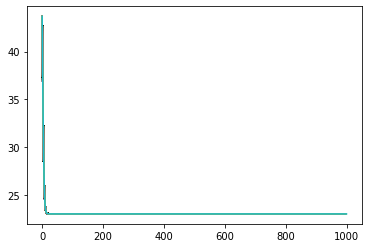

In [ ]:
for i in range(1000):
  y = model_fn(x,m,c)
  loss = loss_fn(y,yt)
  loss.backward()
  with torch.no_grad():
      m -= 0.05 * m.grad
      c -= 0.05 * c.grad
  m.grad.zero_()
  c.grad.zero_()

  losses+=[loss.item()]
  print( f"loss = {loss}")
  plt.plot(losses);

## Using Library functions

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(5, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 5),
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1616, -0.2809, -0.1754,  0.3181, -0.4102],
         [-0.3271,  0.3970,  0.3911,  0.3099, -0.3973],
         [ 0.0751,  0.0095,  0.2664, -0.1789,  0.1173],
         [ 0.1278, -0.4385,  0.1929, -0.1575, -0.2441],
         [-0.3250, -0.3798,  0.0452, -0.2026,  0.2446]], requires_grad=True),
 Parameter containing:
 tensor([-0.3556,  0.1627,  0.2884, -0.0073,  0.3771], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4454, -0.2138,  0.1116,  0.2253, -0.1806],
         [-0.0161,  0.1084,  0.2893, -0.0940,  0.3490],
         [-0.3674, -0.1149,  0.0186,  0.0138, -0.2781],
         [ 0.4465, -0.0371,  0.2036,  0.0836,  0.3737],
         [ 0.0666, -0.1404,  0.2701, -0.0838, -0.4311]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3714, -0.3381,  0.2672, -0.3060,  0.1305], requires_grad=True)]

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
x = torch.randn(100,5)
yt = torch.randn(100,1)
losses = []

Using the optim package

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

In [ ]:
torch.optim.

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss = 475.00885009765625
loss = 457.6354064941406
loss = 446.7303771972656
loss = 439.40887451171875
loss = 434.2867736816406
loss = 430.36029052734375
loss = 427.0753173828125
loss = 423.9656982421875
loss = 421.0675354003906
loss = 417.72747802734375
loss = 413.99908447265625
loss = 410.58642578125
loss = 408.0198974609375
loss = 406.3163757324219
loss = 405.16448974609375
loss = 404.47528076171875
loss = 403.4824523925781
loss = 401.96563720703125
loss = 400.1684875488281
loss = 398.3601989746094
loss = 396.7138977050781
loss = 395.2435302734375
loss = 393.963623046875
loss = 393.1605529785156
loss = 392.3914794921875
loss = 391.5802307128906
loss = 390.8912353515625
loss = 390.0355224609375
loss = 389.2562561035156
loss = 388.0806884765625
loss = 387.06390380859375
loss = 386.3192443847656
loss = 385.572509765625
loss = 384.78814697265625
loss = 384.0393981933594
loss = 382.9290771484375
loss = 381.7249755859375
loss = 380.3483581542969
loss = 378.7856140136719
loss = 377.67425537

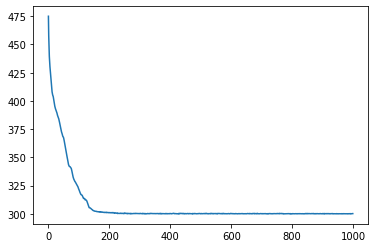

In [ ]:
for i in range(1000):
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
plt.plot(losses);

## MNIST Example

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
data = MNIST(".",download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(data)

60000

In [ ]:
import numpy as np
img,y = data[np.random.randint(1,60000)]
print(y)
img

5


In [ ]:
data.train_data[2].shape

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([28, 28])

In [ ]:
data.train_labels[2]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor(4)

### MNIST Training

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(784, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
sample = np.random.choice(range(len(data.train_data)),1000)
x = data.train_data[sample].reshape(1000,-1).float()/255
yt = data.train_labels[sample]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
x.shape,yt.shape

(torch.Size([1000, 784]), torch.Size([1000]))

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
losses = []

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


loss = 2.3091886043548584
loss = 2.421633243560791
loss = 2.746687173843384
loss = 1.8758249282836914
loss = 1.418844223022461
loss = 1.181101679801941
loss = 0.8480774164199829
loss = 0.8853127360343933
loss = 0.6826867461204529
loss = 0.6943345069885254
loss = 0.8329158425331116
loss = 0.5288072228431702
loss = 0.5125091671943665
loss = 0.4641791582107544
loss = 0.46357011795043945
loss = 0.3807067275047302
loss = 0.3886590003967285
loss = 0.40529558062553406
loss = 0.3502967655658722
loss = 0.333193302154541
loss = 0.32881617546081543
loss = 0.35097938776016235
loss = 0.3163655400276184
loss = 0.29873159527778625
loss = 0.2948206067085266
loss = 0.26398730278015137
loss = 0.31777969002723694
loss = 0.2856494188308716
loss = 0.3361603617668152
loss = 0.31251996755599976
loss = 0.2660728394985199
loss = 0.277740478515625
loss = 0.23137842118740082
loss = 0.30541470646858215
loss = 0.18123957514762878
loss = 0.24073462188243866
loss = 0.2456580400466919
loss = 0.25232651829719543
loss 

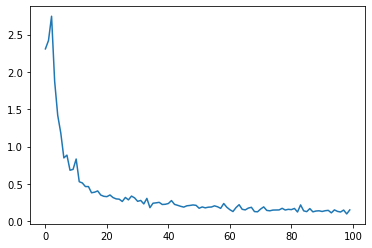

In [ ]:
for i in range(100):
    
    sample = np.random.choice(range(len(data.train_data)),1000)
    x = data.train_data[sample].reshape(1000,-1).float()/255
    yt = data.train_labels[sample]
    
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
plt.plot(losses);

In [ ]:
x_test = data.train_data[-1000:].reshape(1000,-1).float()/255
y_test = data.train_labels[-1000:]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
with torch.no_grad():
    y_pred = model(x_test)

In [ ]:
print("Accuracy = ", (y_pred.argmax(dim=1) == y_test).sum().float().item()/1000.0)

Accuracy =  0.971


## Course Conclusion

By now you should have a sufficient introduction to the various ways one can use python for scientific computing. The best way to learn more is to start using python for whatever project you are working on. Only practice will make you comfortable with using python.
